#### TABLE OF CONTENTS:

* [Introduction](#section-one)
* [Feature Engineering](#section-two)
    - [Imputing Nans](#subsection-one)
    - [Extracting year,month and more](#subsection-two)

* [Data-Visualization](#section-three)
    - [Displot for data distribution](#subsection-seventeen)
    - [Area-Plot](#subsection-six)
    - [lineplot for entire decade(2010-2021)](#subsection-fifteen)
    - [Scatter-Plot represent stock price over the decade](#subsection-sixteen)
    - [lineplot for 2010-2015](#subsection-seven)
    - [lineplot for 2016-2020](#subsection-eight)
    - [Histogram for 2010-2015](#subsection-nine)
    - [Histogram for 2016-2020](#subsection-ten)
    - [Half-yearly prices from year 2010-2015](#subsection-twentyone)
    - [Half-yearly prices from year 2016-2020](#subsection-twenty)
    
* [EDA](#section-four)
    - [Top Gainers/Losers for 2010-2020](#subsection-three)
    - [Top Gainers/Losers for 2010-2015](#subsection-four)
    - [Top Gainers/Losers for 2016-2020](#subsection-five)
    - [Mapping Nifty sectors to each stock](#subsection-eleven)
    - [All Time Low and All Time High of a stock](#subsection-tweleve)

* [Conclusion](#section-three)

<a id="section-one"></a>

# INTRODUCTION

#### *This dataset consists of 47 columns where each column represents a nifty-50 stock. The idea for making the [dataset](https://www.kaggle.com/setseries/nifty50-stocks-dataset20102021) this way was to be able to compare changes in stocks's close prices each day (from Jan-2010 to Oct-2021) and compare it with its peer stock. Although each stock tells a different story and should not be compared. Every stock follows a similar cycle/pattern to its fellow stock.*

#### *The motive behind this notebook is explore as many features of a stock as possible, followed by relating it back to the stock market metrics (like:top gainers,all-time highs etc)*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
import calendar
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stocks-dataset20102021/Final-50-stocks.csv


In [2]:
pd.set_option('display.max_columns', None) #This helps in viewing all columns of dataset

In [3]:
df=pd.read_csv('../input/nifty50-stocks-dataset20102021/Final-50-stocks.csv')
df.sample(5)

,DATE,TATASTEEL,WIPRO,TITAN,ULTRACEMO,TECHM,RELIANCE,SHREECEM,SUNPHARMA,TATAMOTORS,TCS,SBIN,NESTLEIND,NTPC,M&M,MARUTI,ONGC,POWERGRID,JSWSTEEL,KOTAKBANK,LT,ICICIBANK,INDUSBANK,INFY,IOC,ITC,HEROMOTOCO,HINDALCO,HINDUNILVR,HCLTECH,HDFCBANK,HDFC,DRREDDYS,EICHERMOTOR,GRASIM,CIPLA,COALINDIA,BPCL,BRITANNIA,ADANIPORTS,BAJAJFINSERV,BAJAJFINANCE,BHARTIARTL,AXISBANK,BAJAJ-AUTO,ASIANPAINT,UPL
1645,2017-06-10,691.45,286.60,596.60,4241.30,456.85,837.05,18774.95,530.20,424.85,2446.65,256.75,7352.80,176.05,1303.00,7903.20,173.85,211.20,257.70,1039.50,1141.80,271.95,1682.50,920.15,415.45,266.15,3703.95,250.90,1207.30,907.90,1800.10,1740.00,2375.85,31541.15,1151.80,585.40,276.70,489.60,4361.85,187.85,5297.95,1923.60,382.30,503.35,3141.55,1157.30,793.40
491,2012-10-05,415.60,408.65,245.85,4150.30,658.30,694.15,2700.15,593.60,289.20,1232.55,1843.15,4502.50,149.40,660.75,1261.85,259.40,193.15,661.25,541.65,1154.95,814.15,315.60,2344.20,265.80,239.25,1843.90,117.50,433.25,491.30,517.50,651.40,1697.65,2198.30,2477.50,326.40,321.30,704.25,553.65,NaN,719.05,858.00,310.10,981.25,1503.75,3653.85,NaN
2660,2021-07-28,1365.00,591.95,1723.55,7654.65,1119.55,2037.35,27491.45,687.80,284.45,3197.80,425.50,18022.55,116.80,728.70,7165.05,114.35,228.10,721.70,1652.85,1594.20,685.05,992.75,1605.60,104.00,209.10,2777.70,416.30,2361.40,983.10,1417.30,2425.80,4731.75,2550.40,1533.55,889.90,144.05,453.45,3424.10,665.40,13970.55,6262.00,567.90,722.90,3818.50,3004.10,814.65
174,2011-07-02,640.40,426.90,3448.00,3974.90,629.50,929.05,1615.60,410.10,1146.35,1131.15,2663.45,3326.00,179.60,669.20,1189.75,1194.55,171.95,898.10,359.80,1539.25,978.75,222.65,NaN,322.40,157.10,NaN,232.25,274.35,477.70,2038.85,590.65,1565.15,1079.60,2301.55,314.55,304.65,594.90,356.80,NaN,415.05,595.10,333.85,1228.55,1217.80,2501.55,NaN
64,2011-01-19,639.60,476.10,3454.70,4629.10,689.45,980.15,1788.70,484.45,1192.75,1193.00,2501.75,3650.65,187.15,750.85,1272.70,1158.85,163.75,1052.95,413.70,1651.50,1023.25,234.00,NaN,313.65,175.45,NaN,235.60,299.65,508.05,2075.45,653.10,1657.85,1118.35,2410.15,351.55,309.40,584.30,354.30,NaN,435.45,630.95,344.45,1280.10,1321.80,2668.35,NaN


<a id="section-two"></a>
# Feature Engineering

In [4]:
df.isna().sum()  #Nan values are present

DATE               0
TATASTEEL          0
WIPRO              0
TITAN              0
ULTRACEMO          0
TECHM              0
RELIANCE           0
SHREECEM           0
SUNPHARMA          0
TATAMOTORS         0
TCS                0
SBIN               0
NESTLEIND          0
NTPC               0
M&M                0
MARUTI             0
ONGC               0
POWERGRID          0
JSWSTEEL           0
KOTAKBANK          0
LT                 0
ICICIBANK          0
INDUSBANK          0
INFY             174
IOC                0
ITC                0
HEROMOTOCO       202
HINDALCO           0
HINDUNILVR         0
HCLTECH            0
HDFCBANK           0
HDFC               0
DRREDDYS           0
EICHERMOTOR        0
GRASIM             0
CIPLA              0
COALINDIA         12
BPCL               0
BRITANNIA          0
ADANIPORTS      1460
BAJAJFINSERV       0
BAJAJFINANCE       0
BHARTIARTL         0
AXISBANK           0
BAJAJ-AUTO         0
ASIANPAINT         0
UPL              752
dtype: int64

#### The thing is that few columns have a good proportion of nan values. Either we can drop nan values which will lead to reduce in size of dataset or we can impute missing values using knn imputer as it takes neighboring values to fill up the spot.

#### It usually happens in stock when current day's stock price is quite near to previous day's stock price.

<a id="subsection-one"></a>

## Imputing missing values with KNNImputer

In [5]:
idx=np.where(df.isna().sum()>0)[0]     #finding index of columns where nan-values are more than 0 
cols=df.iloc[:,idx].columns
cols

Index(['INFY', 'HEROMOTOCO', 'COALINDIA', 'ADANIPORTS', 'UPL'], dtype='object')

In [6]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df[cols]=imputer.fit_transform(df[cols])         #fitting knn imputer to impute nan values with two neighbouring values 
df[cols]=np.round(df[cols],2)

<a id="subsection-two"></a>

## Extracting year and month 

In [7]:
df.DATE=df.DATE.apply(pd.to_datetime)

In [8]:
df['year']=df.DATE.apply(lambda x:datetime.date(x).year)
df['month']=df.DATE.apply(lambda x:datetime.date(x).month)
df['day']=df.DATE.apply(lambda x:datetime.date(x).day)
df['day_num']=df.DATE.apply(lambda x:datetime.date(x).weekday())
df['week_num']=df.DATE.apply(lambda x:datetime.date(x).isocalendar()[1])

<AxesSubplot:>

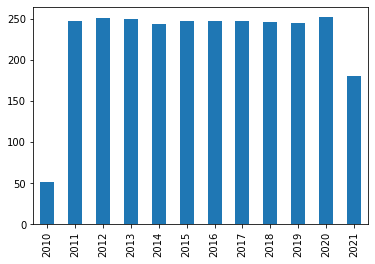

In [9]:
df.year.value_counts().sort_index(ascending=True).plot(kind='bar')
# Year 2010 has the least number of listed stocks on NIFTY-50

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

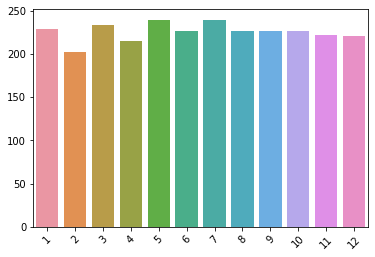

In [10]:
df['month_name']=df.month.apply(lambda x: calendar.month_name[x])
sns.barplot(df.month.value_counts().index,df.month.value_counts().values)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='week_num'>

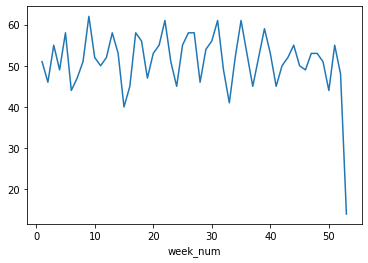

In [11]:
df.groupby('week_num')['week_num'].count().plot()
# week 51,52,53 occurs quite rarely in stock market

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='day_num'>

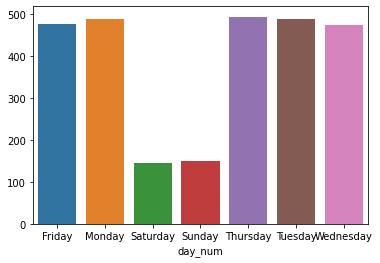

In [12]:
df.day_num=df.day_num.apply(lambda x: calendar.day_name[x])
sns.barplot(df.groupby('day_num')['day_num'].count().index,df.groupby('day_num')['day_num'].count().values)
#Sat & Sun have least number of stock market entries

<a id='section-three'></a>
# Data Visualization

In [13]:
df2=df.copy()
df2.drop(["month_name","day_num"],axis=1,inplace=True)

<a id='subsection-seventeen'></a>
## Displot for data distribution

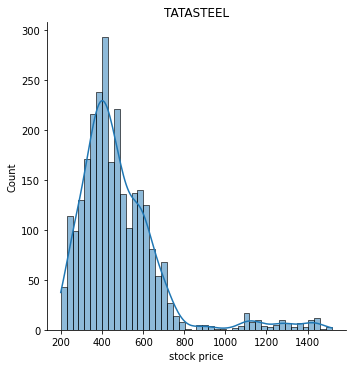

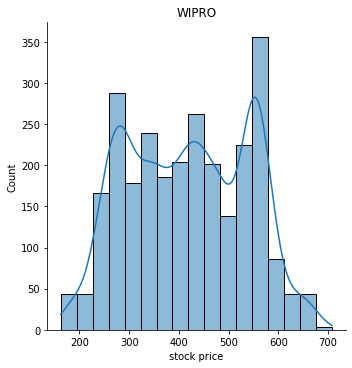

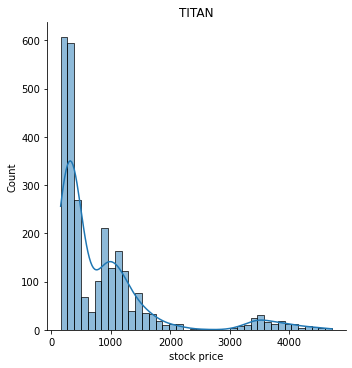

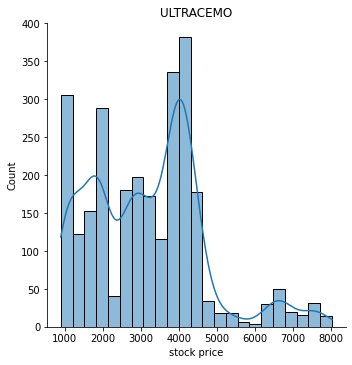

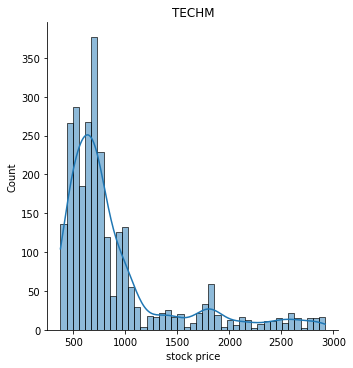

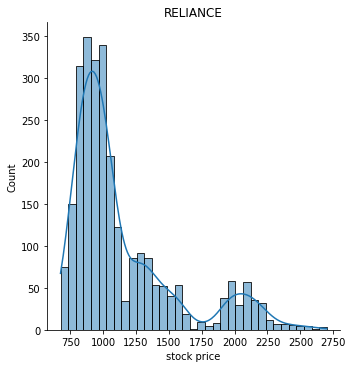

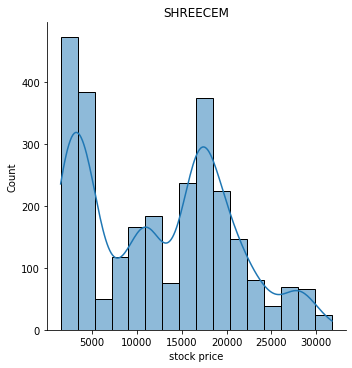

In [14]:
for i in df2.columns[1:8]:             #first 5 stocks in the dataset
    sns.displot(df2[i],kde=True)
    plt.title(i)
    plt.xlabel('stock price')
    plt.show()

#### The displot displays the variation in distibution of prices. Example in case `Wipro` of the range is even which means that prices are not diversified but centered around the mean.
#### Whereas incase of `Titan` the prices are right skewed and lot of variation can be seen.

<a id='subsection-six'></a>
## Area-plot showing growth of a stock's price over time

##### Here we are going to see increase/decrease in stock prices of a stock over a decade

##### Areaplot shows the exponential change in stock prices overtime

<Figure size 864x432 with 0 Axes>

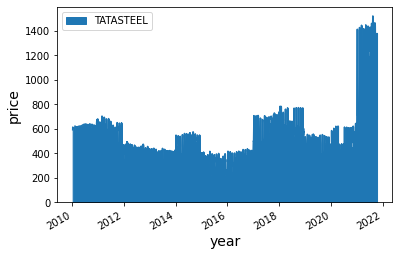

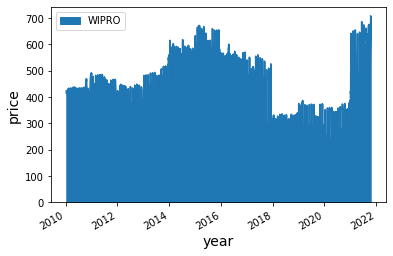

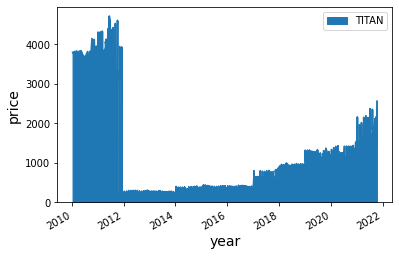

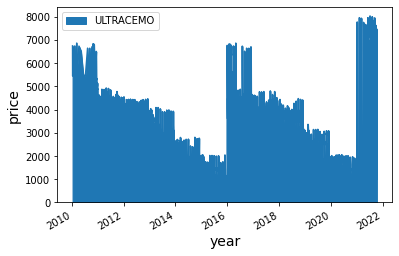

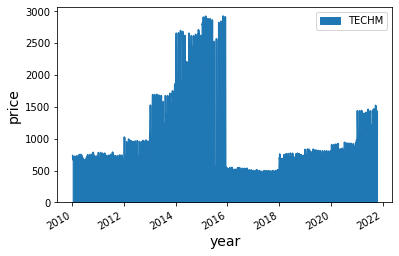

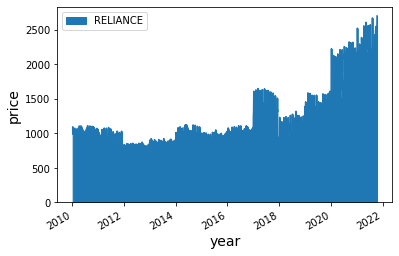

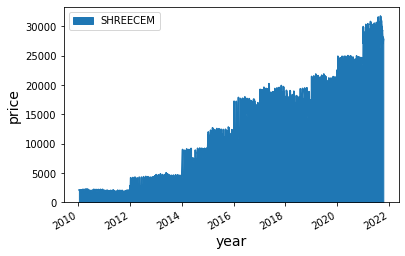

In [15]:
plt.figure(figsize=(12,6))
def area_plot():
    for stock_name in df.columns[1:8]:                           #plotting first 8 stocks
        df.plot.area(x='DATE',y=stock_name)
        plt.xlabel('year',fontsize=14)
        plt.ylabel('price',fontsize=14)
area_plot()

<a id='subsection-fifteen'></a>
## Line-PLot to plot stock prices from (2010-2021)

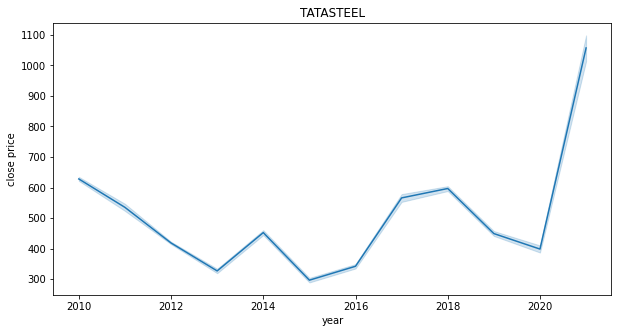

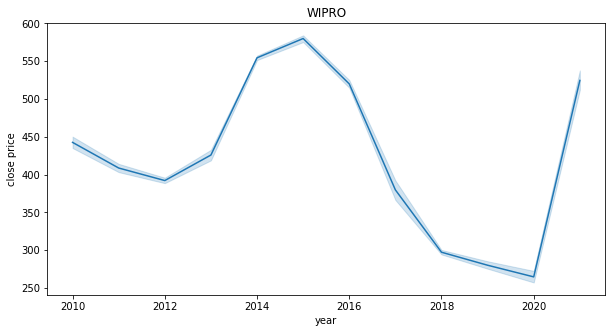

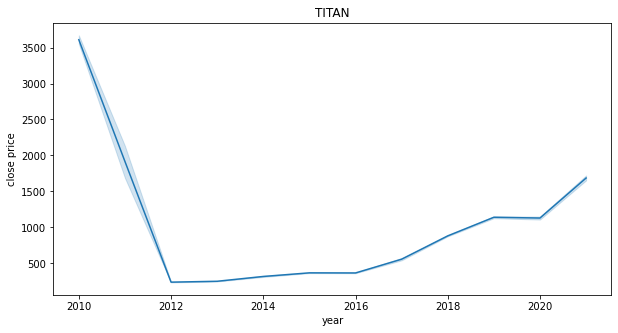

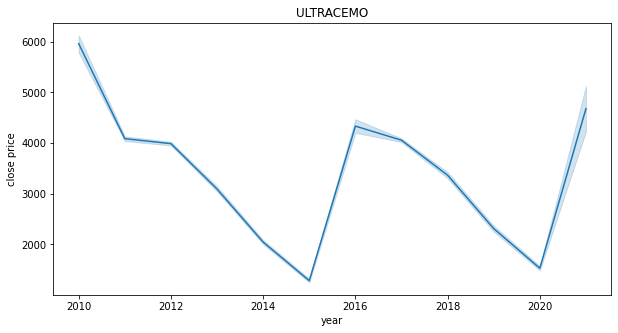

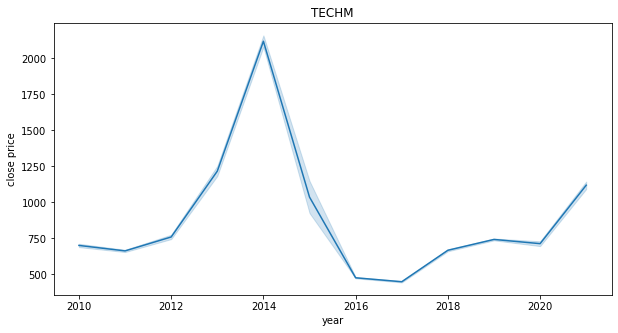

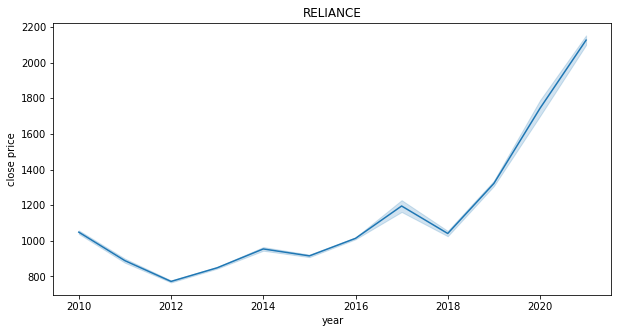

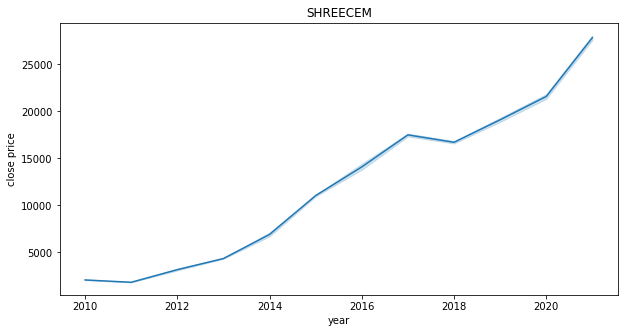

In [16]:
for name in df2.columns[1:8]:  # Taking first 8 columns for line-plot
    plt.figure(figsize=(10,5))
    sns.lineplot(x="year",y=name,data=df2)
    plt.title(name)
    plt.ylabel('close price')
    plt.show()

<a id='subsection-sixteen'></a>
## Scatter-Plot for distribution of stock price (2010-2021)

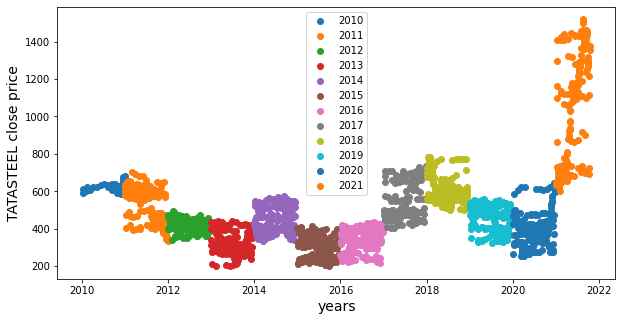

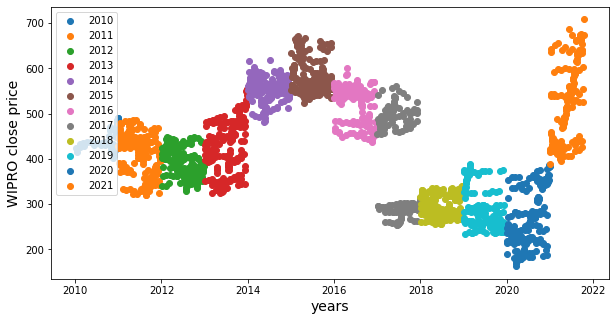

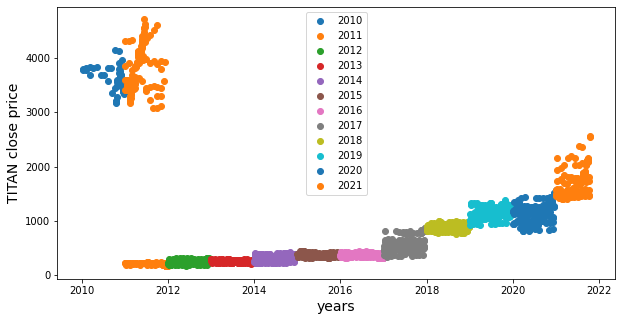

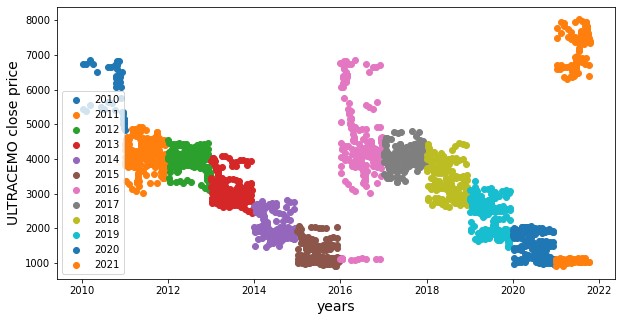

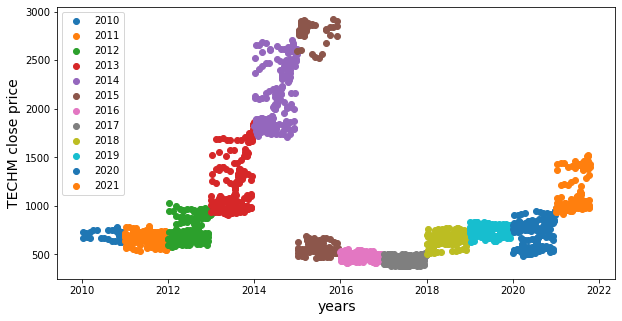

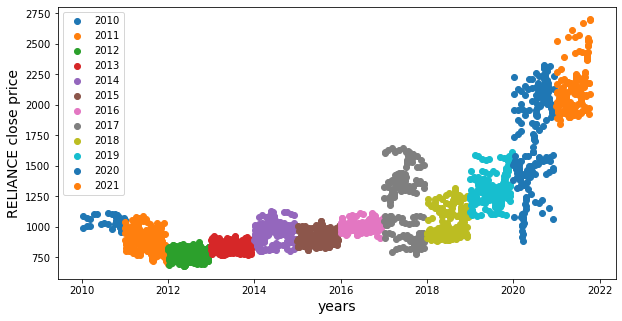

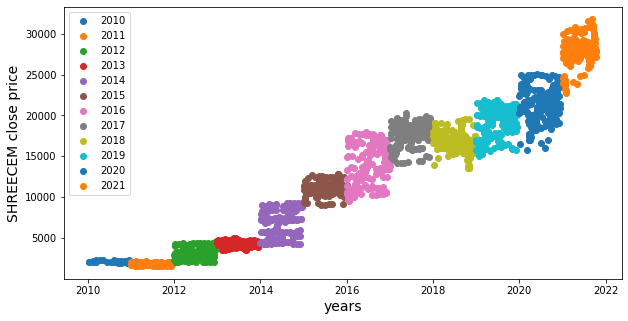

In [17]:
for name in df2.columns[1:8]:                   #Taking first 8 columns only for scatter-plot
    plt.figure(figsize=(10,5))
    for i in df2.year.unique():
        d=df2.loc[df2.year==i,[name,'DATE']]
        plt.scatter(d["DATE"],d[name])    

    plt.xlabel('years',fontsize=14)
    plt.ylabel(f'{name} close price',fontsize=14)
    
    plt.legend(['2010',"2011",'2012',"2013","2014","2015","2016","2017","2018","2019", "2020","2021"])
    plt.show()

#### Now we are going to divide our stocks dataset into two datasets:
####    `df3_below_mean` If a stock's prices appears more in this dataset than `df3_above_mean` it means that the stock was on its peak in initial years but is struggling to go par its mean in recent years(example- Titan was on peak in 2010-2015 but is struggling recently)

####    `df3_above_mean` If a stock's prices appears more in this dataset than `df3_below_mean` it means that the stock is on its peak right now but was underperforming in its initial years. (example- TCS had a slow start in recent years but is now picking its pace up)

In [18]:
df3_above_mean=pd.DataFrame()

for i in df2.columns:
    df3_above_mean[f"{i}_Above"]=df2.loc[df2[i]>df2[i].mean(),i].reset_index(drop=True)


In [19]:
df3_below_mean=pd.DataFrame()

for i in df2.columns:
    df3_below_mean[f"{i}_Below"]=df2.loc[df2[i]<df2[i].mean(),i].reset_index(drop=True)

In [20]:
df3_below_mean.year_Below.value_counts() #2015 is cutoff -date for stock prices below mean

2012.0    251
2013.0    250
2015.0    248
2011.0    247
2014.0    244
2010.0     52
Name: year_Below, dtype: int64

In [21]:
df3_above_mean.year_Above.value_counts() #from 2016 stock prices started to go par thier mean

2020    252
2017    248
2016    247
2018    246
2019    245
2021    117
Name: year_Above, dtype: int64

In [22]:
def hide_axis():
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot()
    ax.axes.get_xaxis().set_visible(False)

In [23]:
df3_below_mean.columns

Index(['DATE_Below', 'TATASTEEL_Below', 'WIPRO_Below', 'TITAN_Below',
       'ULTRACEMO_Below', 'TECHM_Below', 'RELIANCE_Below', 'SHREECEM_Below',
       'SUNPHARMA_Below', 'TATAMOTORS_Below', 'TCS_Below', 'SBIN_Below',
       'NESTLEIND_Below', 'NTPC_Below', 'M&M_Below', 'MARUTI_Below',
       'ONGC_Below', 'POWERGRID_Below', 'JSWSTEEL_Below', 'KOTAKBANK_Below',
       'LT_Below', 'ICICIBANK_Below', 'INDUSBANK_Below', 'INFY_Below',
       'IOC_Below', 'ITC_Below', 'HEROMOTOCO_Below', 'HINDALCO_Below',
       'HINDUNILVR_Below', 'HCLTECH_Below', 'HDFCBANK_Below', 'HDFC_Below',
       'DRREDDYS_Below', 'EICHERMOTOR_Below', 'GRASIM_Below', 'CIPLA_Below',
       'COALINDIA_Below', 'BPCL_Below', 'BRITANNIA_Below', 'ADANIPORTS_Below',
       'BAJAJFINSERV_Below', 'BAJAJFINANCE_Below', 'BHARTIARTL_Below',
       'AXISBANK_Below', 'BAJAJ-AUTO_Below', 'ASIANPAINT_Below', 'UPL_Below',
       'year_Below', 'month_Below', 'day_Below', 'week_num_Below'],
      dtype='object')

<a id='subsection-seven'></a>
## Lineplot of a stock's price over multiple years(from 2010 to 2015)

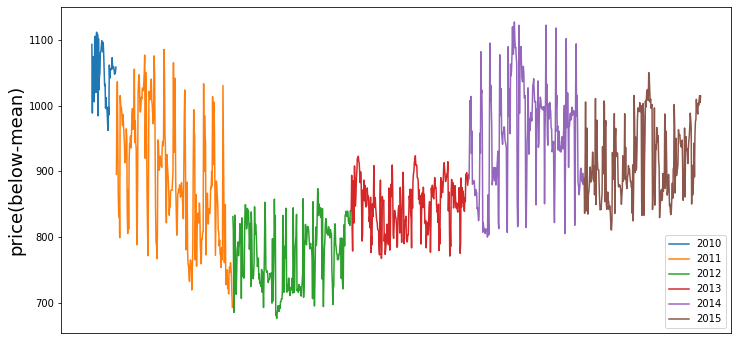

In [24]:
def line_plot_below_mean(cols):
    hide_axis()
    for i in df3_below_mean['year_Below'].unique():
        plt.plot(df3_below_mean.loc[df3_below_mean['year_Below']==i,cols])
        plt.xlabel("Across the years",fontsize=18)
        plt.ylabel("price(below-mean)",fontsize=18)
        plt.legend(["2010","2011","2012","2013","2014", "2015"])
line_plot_below_mean("RELIANCE_Below")           #enter stock name here

Here the graph is not going above the mean price (Rs.1100)

<a id='subsection-eight'></a>
## Lineplot of a stock's price over multiple years(from 2016 to 2020)

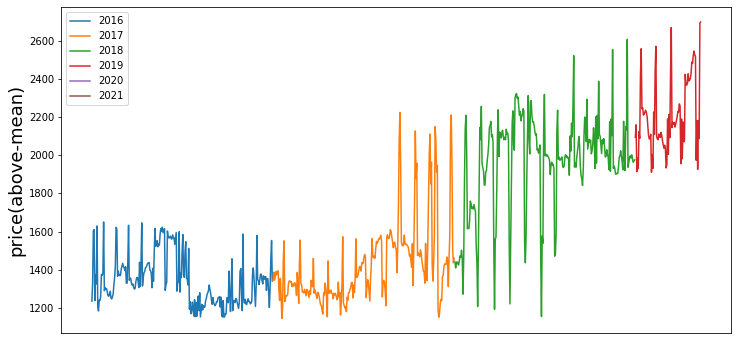

In [25]:
def line_plot_above_mean(cols):
    hide_axis()
    for i in df3_above_mean['year_Above'].unique():
        plt.plot(df3_above_mean.loc[df3_above_mean['year_Above']==i,cols])
        plt.xlabel("Across the years",fontsize=18)
        plt.ylabel("price(above-mean)",fontsize=18)
        plt.legend(["2016","2017","2018","2019","2020", "2021"])
line_plot_above_mean("RELIANCE_Above")           #enter stock name here

##### Here in the graph we can see that from 2018 reliance prices crossed (rs.2000) far above its mean price (Rs.1100)

<a id='subsection-nine'></a>
## Histplot of a particular stock for multiple years(from 2010 to 2015)

RELIANCE_Below 2010.0


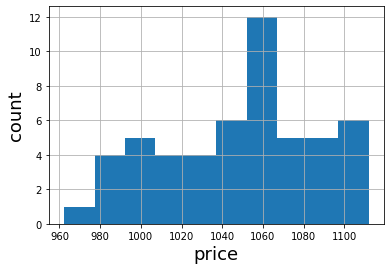

RELIANCE_Below 2011.0


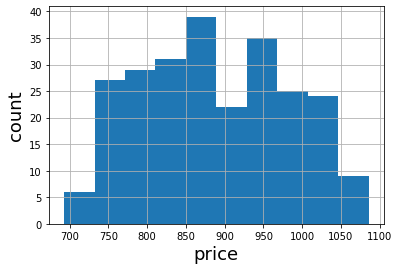

RELIANCE_Below 2012.0


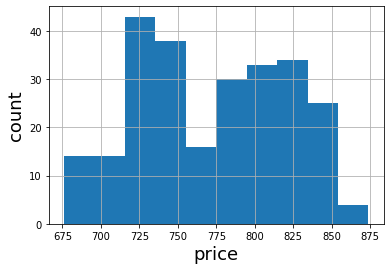

RELIANCE_Below 2013.0


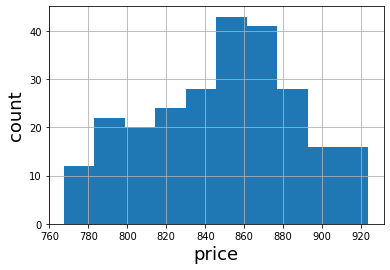

RELIANCE_Below 2014.0


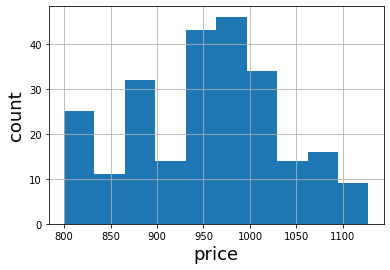

RELIANCE_Below 2015.0


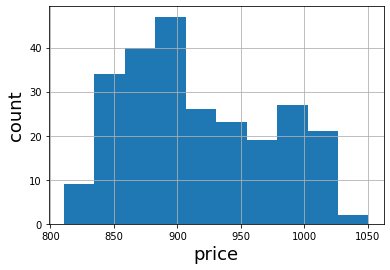

RELIANCE_Below nan


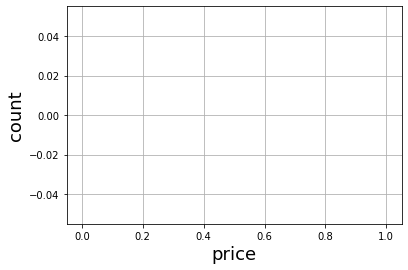

In [26]:
def hist_below_mean(cols):
    for i in df3_below_mean['year_Below'].unique():
        d=df3_below_mean.loc[df3_below_mean['year_Below']==i,cols]
        print(cols,i)
        d.hist()
        plt.xlabel('price',fontsize=18)
        plt.ylabel('count',fontsize=18)
        plt.show()
hist_below_mean("RELIANCE_Below")       #enter stock name here

##### Here is the distribution of reliance stock prices from 2010-2015. for example in 2015 its price range was (rs.800-1050) and mean was around 900

<a id='subsection-ten'></a>
## Histplot of a particular stock for multiple years(from 2016 to 2020)

RELIANCE_Above 2016


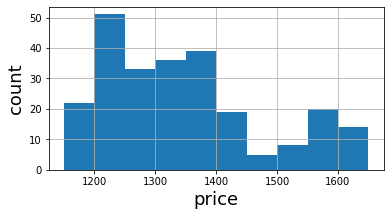

RELIANCE_Above 2017


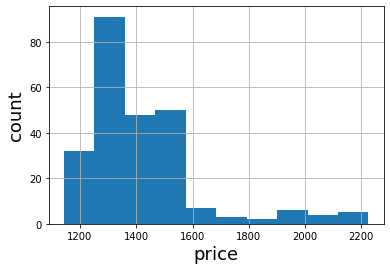

RELIANCE_Above 2018


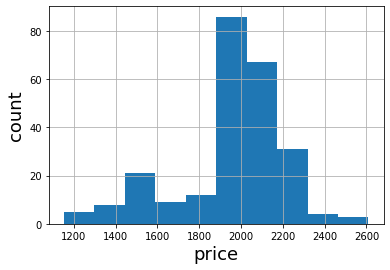

RELIANCE_Above 2019


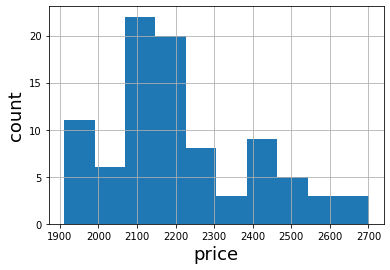

RELIANCE_Above 2020


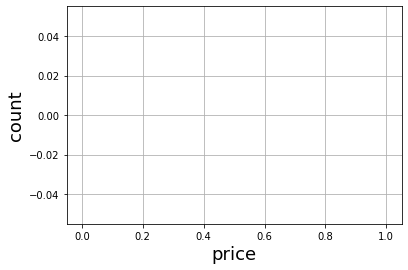

RELIANCE_Above 2021


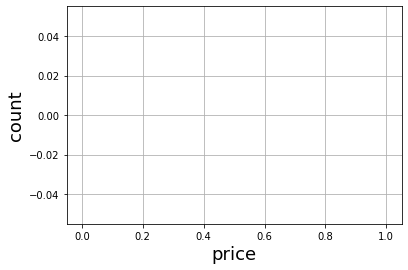

In [27]:
plt.figure(figsize=(6,3))
def hist_above_mean(cols):
    for i in df3_above_mean['year_Above'].unique():
        d=df3_above_mean.loc[df3_above_mean['year_Above']==i,cols]
        print(cols,i)
        d.hist()
        plt.xlabel('price',fontsize=18)
        plt.ylabel('count',fontsize=18)
        plt.show()
        
hist_above_mean("RELIANCE_Above")   #enter stock name here

#### Here is the hist distribution of reliance stock prices from 2016-2020. for example in 2018 stock prices went beyond rs.2000 for the first time. Possibly 80 days it have stayed around 2000

<a id='subsection-twenty' ></a>
## Half yearly stock prices for the decade (above-mean prices)

#### Here we take stock prices every six months by taking the mean value of each month's price...

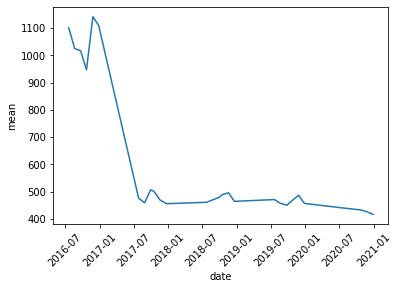

In [28]:
mean_vals=[]
yr=[]
mon=[]

def plot_monthly_prices(stock_name):
    for year in df3_above_mean['year_Above'].unique():
        for month in df3_above_mean['month_Above'].unique():
            mean_vals.append(df3_above_mean.loc[(df3_above_mean['month_Above']==month) & (df3_above_mean['year_Above']==year),f'{stock_name}_Above'].mean())
            yr.append(year)
            mon.append(month)
 
    new_df=pd.DataFrame()
    days=[19, 20, 21, 22, 25, 26, 27, 28, 29, 16, 18, 23, 24, 29, 30, 17,19, 20, 21, 22, 25, 26, 27, 28, 29, 16, 18, 23, 24, 28, 30, 17,19,20,21,22]
    new_df['day']=days
    new_df['mean']=mean_vals
    new_df['month']=mon
    new_df['year']=yr
    
    new_df['date']=pd.to_datetime(new_df[["year", "month", "day"]])
    sns.lineplot(x='date',y='mean',data=new_df)
    plt.xticks(rotation=45)

plot_monthly_prices('TATAMOTORS')

<a id='subsection-twentyone' ></a>
## Half yearly stock prices for the decade (below-mean prices)

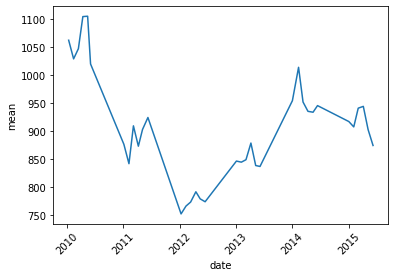

In [29]:
mean_vals=[]
yr=[]
mon=[]

def plot_monthly_prices(stock_name):
    for year in df3_below_mean['year_Below'].unique():
        for month in df3_below_mean['month_Below'].unique():
            mean_vals.append(df3_below_mean.loc[(df3_below_mean['month_Below']==month) & (df3_below_mean['year_Below']==year),f'{stock_name}_Below'].mean())
            yr.append(year)
            mon.append(month)
 
    new_df=pd.DataFrame()
    days=[11., 12., 15., 13., 14.,  2.,  3.,  4.,  6.,  7.,  8.,  5.,  9.,1., 10.,11., 12., 15., 13., 14.,  2.,  3.,  4.,  6.,  7.,  8.,  5.,  9.,
          1., 10.,11., 12., 15., 13., 14.,  2.,  3.,  4.,  6.,  7.,  8.,  5.,  9., 1., 10.,11.,12.,15.,13.]
    new_df['day']=days
    new_df['mean']=mean_vals
    new_df['month']=mon
    new_df['year']=yr
     
    new_df['date']=pd.to_datetime(new_df[["year", "month", "day"]])
    sns.lineplot(x='date',y='mean',data=new_df)
    plt.xticks(rotation=45)

plot_monthly_prices('RELIANCE')

<a id='section-four'></a>
# Exploratory Data Analysis

<a id='subsection-three'></a>
## Top Gainers/losers for 2010-2020


#### Here, first we are going to subract first record from the last record and then append it as row to dataset. Then we are going to make the losers list, by taking elements only positive values from the last row. If value is negative it means its a gain and positive means a loss. 

#### Example Reliance's price on 1st jan 2010= 200, Reliance's price on 31st dec 2020= 2000 .So (200-2000=-1800 gained). 

#### Lastly we are going to exclude losers list from the dataset and remaining columns make up for gainers list.

In [30]:
df=df.iloc[:,1:48]

In [31]:
# making list of first occurance-last occurance stock price and appending as a row
d=(df.iloc[1,:].values-df.iloc[-1,:].values).tolist()
df.iloc[-1,:]=d

#### Top Losers throughout the past decade

In [32]:
# preparing a losers list by filtering values more than 0(positive values =losers)
idx=np.where(df.iloc[-1,:]>0)[0]
names_=df.iloc[2710,idx].sort_values(ascending=False)
losers_list=names_.index.tolist()

In [33]:
#15 nifty losers stocks
len(losers_list)

15

Absolute change wise **Losers** (2010-2020)

In [34]:
round(np.abs(df.loc[2710,losers_list])).sort_values(ascending=False)[:5]

SBIN          2610.0
TITAN         1218.0
ONGC          1127.0
TATAMOTORS     789.0
HDFCBANK       680.0
Name: 2710, dtype: float64

Percentage change wise **Losers** (2010-2020)

In [35]:
round(np.abs(df.loc[2710,losers_list]/df.loc[2709,losers_list]),2).sort_values(ascending=False)[:5]

ONGC          7.04
SBIN          5.42
IOC           1.91
TATAMOTORS    1.56
AXISBANK      0.78
dtype: float64


#### Top Gainers throughout the Decade

In [36]:
# taking everything except common elements in list a and list b to form gainers list
a=df.iloc[-1,:].index.tolist()
b=losers_list

gainers_list = list(set(a)^set(b))

In [37]:
# 32 nifty stocks are gainers
len(gainers_list)

32

Absolute price change wise **Gainers** (2010-2020)

In [38]:
round(np.abs(df.loc[2710,gainers_list])).sort_values(ascending=False)[:6]

SHREECEM        25862.0
BAJAJFINSERV    18007.0
NESTLEIND       15757.0
BAJAJFINANCE     7150.0
MARUTI           6083.0
BRITANNIA        3485.0
Name: 2710, dtype: float64

Percentage change wise **Gainers** (2010-2020)

In [39]:
round(np.abs(df.loc[2710,gainers_list]/df.loc[2709,gainers_list]),2).sort_values(ascending=False)[:6]

BAJAJFINSERV    0.99
SHREECEM        0.93
BRITANNIA       0.90
BAJAJFINANCE    0.90
ADANIPORTS      0.90
HINDUNILVR      0.89
dtype: float64

<a id='subsection-five'></a>
## Top Gainers/losers for 2016-2020


#### Top Losers in last 5 years

In [40]:
df3_above_mean=df3_above_mean.iloc[:,1:48]

In [41]:
d=(df3_above_mean.iloc[1,:].values-df3_above_mean.iloc[-1,:].values).tolist()
df3_above_mean.iloc[-1,:]=d

In [42]:
idx=np.where(df3_above_mean.iloc[-1,:]>0)[0]
names_=df3_above_mean.iloc[1027,idx].sort_values(ascending=False)
losers_list=names_.index.tolist()

# ['TITAN_Above','SUNPHARMA_Above', 'TATAMOTORS_Above','ONGC_Above', ULTRACEMO_Above] are the top losers in 5 years
# Titan prices have gone down the most in last 5 years

In [43]:
losers_list

['COALINDIA_Above', 'ITC_Above', 'NTPC_Above']

Absolute price change wise **Losers** (2016-2020)

In [44]:
round(np.abs(df3_above_mean.loc[1027,losers_list])).sort_values(ascending=False)[:5]

COALINDIA_Above    380.0
ITC_Above          290.0
NTPC_Above         165.0
Name: 1027, dtype: float64

Percentage change wise **Losers** (2016-2020)

In [45]:
round(np.abs(df3_above_mean.loc[1027,losers_list]/df3_above_mean.loc[1026,losers_list]),2).sort_values(ascending=False)[:5]

#age change in thier prices

ITC_Above          0.99
NTPC_Above         0.99
COALINDIA_Above    0.97
dtype: float64

#### Top Gainers in last 5 years

In [46]:
a=df3_above_mean.iloc[-1,:].index.tolist()
b=losers_list

gainers_list = list(set(a)^set(b))
gainers_list

['TATASTEEL_Above',
 'TCS_Above',
 'HINDALCO_Above',
 'HCLTECH_Above',
 'ASIANPAINT_Above',
 'BRITANNIA_Above',
 'HINDUNILVR_Above',
 'MARUTI_Above',
 'TATAMOTORS_Above',
 'RELIANCE_Above',
 'M&M_Above',
 'BPCL_Above',
 'BAJAJFINSERV_Above',
 'BAJAJ-AUTO_Above',
 'EICHERMOTOR_Above',
 'POWERGRID_Above',
 'JSWSTEEL_Above',
 'ONGC_Above',
 'CIPLA_Above',
 'ICICIBANK_Above',
 'BHARTIARTL_Above',
 'AXISBANK_Above',
 'GRASIM_Above',
 'ULTRACEMO_Above',
 'HDFCBANK_Above',
 'IOC_Above',
 'KOTAKBANK_Above',
 'INDUSBANK_Above',
 'TITAN_Above',
 'BAJAJFINANCE_Above',
 'NESTLEIND_Above',
 'TECHM_Above',
 'year_Above',
 'SHREECEM_Above',
 'DRREDDYS_Above',
 'UPL_Above',
 'WIPRO_Above',
 'SBIN_Above',
 'HEROMOTOCO_Above',
 'LT_Above',
 'ADANIPORTS_Above',
 'INFY_Above',
 'SUNPHARMA_Above',
 'HDFC_Above']

Absolute price change wise **Gainers** (2016-2020)

In [47]:
round(np.abs(df3_above_mean.loc[1027,gainers_list])).sort_values(ascending=False)[:5]
#top gainers in last 5 years are ['BAJAJFINSERV_Above', 'BAJAJFINANCE_Above', 'SHREECEM_Above','EICHERMOTOR_Above', 'DRREDDYS_Above']

SHREECEM_Above        20857.0
EICHERMOTOR_Above     20048.0
BAJAJFINSERV_Above    11177.0
BAJAJFINANCE_Above     7414.0
MARUTI_Above           5875.0
Name: 1027, dtype: float64

Percentage change wise **Gainers** (2016-2020)

In [48]:
round(np.abs(df3_above_mean.loc[1027,gainers_list]/df3_above_mean.loc[1026,gainers_list]),2).sort_values(ascending=False)[:5]

# %age change in prices

HINDALCO_Above        1.09
ADANIPORTS_Above      1.08
BAJAJFINSERV_Above    1.07
LT_Above              1.05
GRASIM_Above          1.03
dtype: float64

<a id='subsection-four'> </a>
## Top Gainers/losers for 2010-2015


#### Top Losers in first 5 years

In [49]:
df3_below_mean=df3_below_mean.iloc[:,1:48]

In [50]:
d=(df3_below_mean.iloc[1,:].values-df3_below_mean.iloc[-1,:].values).tolist()
df3_below_mean.iloc[-1,:]=d

In [51]:
idx=np.where(df3_below_mean.iloc[-1,:]>0)[0]
names_=df3_below_mean.iloc[1027,idx].sort_values(ascending=False)
losers_list=names_.index.tolist()

Absolute price change wise **Losers** (2010-2015)

In [52]:
round(np.abs(df3_below_mean.loc[1027,losers_list])).sort_values(ascending=False)[:5]

ULTRACEMO_Below    1776.0
INFY_Below          708.0
M&M_Below           662.0
AXISBANK_Below      614.0
SUNPHARMA_Below     562.0
Name: 1027, dtype: float64

Percentage change wise **Losers** (2010-2015)

In [53]:
round(np.abs(df3_below_mean.loc[1027,losers_list]/df3_below_mean.loc[1026,losers_list]),2).sort_values(ascending=False)[:5]

HINDALCO_Below     1.14
AXISBANK_Below     1.03
BPCL_Below         1.01
ICICIBANK_Below    1.01
ONGC_Below         1.01
dtype: float64

#### Top Gainers in first 5 years

In [54]:
a=df3_below_mean.iloc[-1,:].index.tolist()
b=losers_list

gainers_list = list(set(a)^set(b))

Absolute price change wise **Gainers** (2010-2015)

In [55]:
round(np.abs(df3_below_mean.loc[1027,gainers_list])).sort_values(ascending=False)[:5]

SHREECEM_Below      7280.0
NESTLEIND_Below     4998.0
DRREDDYS_Below      2687.0
MARUTI_Below        2481.0
HEROMOTOCO_Below    2428.0
Name: 1027, dtype: float64

Percentage change wise **Gainers** (2010-2015)

In [56]:
round(np.abs(df3_below_mean.loc[1027,gainers_list]/df3_below_mean.loc[1026,gainers_list]),2).sort_values(ascending=False)[:5]

MARUTI_Below        1.21
SHREECEM_Below      1.21
BRITANNIA_Below     1.16
HINDUNILVR_Below    1.10
HDFC_Below          1.10
dtype: float64

<a id='subsection-eleven'></a>
## Mapping Nifty sectors to each stock

![](http://scontent.fhyd2-2.fna.fbcdn.net/v/t1.18169-9/12143280_1639222123017328_2734027745677467051_n.png?_nc_cat=111&ccb=1-5&_nc_sid=9267fe&_nc_ohc=9it_o-1iFOUAX8F9sm8&_nc_ht=scontent.fhyd2-2.fna&oh=4fa711f399eccd4987f30bddee018163&oe=6195BAAB)

#### So we see that majority of nifty stocks belong to banking sector.Followed by,IT and energy. This means these three sectors should carry a major portion of nifty stocks. Lets see if that is the case..

In [57]:
d=pd.DataFrame(df2.columns[1:47])
d.columns=['stock_names']

In [58]:
dicts={"NIFTY-METAL":["TATASTEEL","HINDALCO","JSWSTEEL",],"NIFTY-IT":['TECHM',"TCS","WIPRO","INFY","HCLTECH"],"NIFTY-AUTO":['TATAMOTORS',"M&M","HEROMOTOCO","BAJAJ-AUTO","EICHERMOTOR","MARUTI"],"NIFTY-BANK":['SBIN',"HDFCBANK","KOTAKBANK","ICICIBANK","INDUSBANK","BAJAJFINANCE","AXISBANK","HDFC"],
       "NIFTY-INFRA":["ULTRACEMO","ASIANPAINT","ADANIPORTS","SHREECEM","LT"],"NIFTY-FMCG":["TITAN","NESTLEIND","BRITANNIA","HINDUNILVR","ITC"],"NIFTY-PHARMA":['DRREDDYS',"CIPLA","DRREDDYS","SUNPHARMA"],"NIFTY-FINSERV":['BAJAJFINSERV']
       ,"NIFTY-ENERGY":['ONGC',"NTPC","POWERGRID","COALINDIA","BPCL","IOC","RELIANCE"],"NIFTY-Comm.":["BHARTIARTL"],"NIFTY-AGRO":['UPL'],"NIFTY-Textiles":['GRASIM']}

In [59]:
d['sectors']=''
for name in range(len(d.index)):
    for i,j in dicts.items():
        if d.stock_names[name] in j:
            d['sectors'][name]=i

d

,stock_names,sectors
0,TATASTEEL,NIFTY-METAL
1,WIPRO,NIFTY-IT
2,TITAN,NIFTY-FMCG
3,ULTRACEMO,NIFTY-INFRA
4,TECHM,NIFTY-IT
5,RELIANCE,NIFTY-ENERGY
6,SHREECEM,NIFTY-INFRA
7,SUNPHARMA,NIFTY-PHARMA
8,TATAMOTORS,NIFTY-AUTO
9,TCS,NIFTY-IT


In [60]:
d.sectors.value_counts()

NIFTY-BANK        8
NIFTY-ENERGY      7
NIFTY-AUTO        6
NIFTY-IT          5
NIFTY-FMCG        5
NIFTY-INFRA       5
NIFTY-METAL       3
NIFTY-PHARMA      3
NIFTY-Textiles    1
NIFTY-FINSERV     1
NIFTY-Comm.       1
NIFTY-AGRO        1
Name: sectors, dtype: int64

<a id='subsection-tweleve'></a>
## All Time Lows and All Time Highs of each stock

#### A stock being at its lifetime high or lifetime low can be crucial for making investment decisions.  Lets see if any stock is at such a point...

In [61]:
frame=pd.DataFrame({"stocks":df2.columns[1:48]})

In [62]:
all_lows_list=[]
all_highs_list=[]
for name in frame.stocks:
    all_lows_list.append(df2[name].min())
    all_highs_list.append(df2[name].max())

In [63]:
frame["ATH"]=all_highs_list
frame['ATL']=all_lows_list
frame

,stocks,ATH,ATL
0,TATASTEEL,1519.40,198.25
1,WIPRO,708.25,162.35
2,TITAN,4714.60,156.20
3,ULTRACEMO,8026.25,897.25
4,TECHM,2921.65,376.30
5,RELIANCE,2700.40,676.10
6,SHREECEM,31748.75,1520.30
7,SUNPHARMA,2328.00,324.50
8,TATAMOTORS,1365.15,65.30
9,TCS,3954.55,918.05


In [64]:
#getting the latest prices of stocks in our dataset(oct-14 2021)
frame['current_price']=df2.iloc[-1,1:48].values

#### Stocks that are closer to their all-time-highs

In [65]:
idx_all_high=np.where(np.abs(frame['current_price'].values- frame['ATL'].values) > np.abs(frame['current_price'].values- frame['ATH'].values))[0]

near_all_time_high=np.where(frame.iloc[idx_all_high,-1].values> frame.iloc[idx_all_high,1].values-frame.iloc[idx_all_high,1].values*(10/100))
frame.iloc[near_all_time_high]

,stocks,ATH,ATL,current_price
0,TATASTEEL,1519.40,198.25,1375.05
1,WIPRO,708.25,162.35,708.25
3,ULTRACEMO,8026.25,897.25,7395.5
4,TECHM,2921.65,376.30,1430.8
6,SHREECEM,31748.75,1520.30,27956.45
7,SUNPHARMA,2328.00,324.50,841.3
12,NTPC,207.55,76.40,149.4
16,POWERGRID,248.70,92.15,204.65
17,JSWSTEEL,1862.55,140.70,692.85
20,ICICIBANK,1794.10,183.00,727.3


#### Stocks that are closer to their all-time-lows

In [66]:
idx_all_lows=np.where(np.abs(frame['current_price'].values- frame['ATL'].values) < np.abs(frame['current_price'].values- frame['ATH'].values))[0]

frame.iloc[idx_all_lows]

,stocks,ATH,ATL,current_price
4,TECHM,2921.65,376.30,1430.8
7,SUNPHARMA,2328.00,324.50,841.3
8,TATAMOTORS,1365.15,65.30,497.6
10,SBIN,3489.95,150.85,490.6
15,ONGC,1379.45,60.00,159.05
17,JSWSTEEL,1862.55,140.70,692.85
20,ICICIBANK,1794.10,183.00,727.3
22,INFY,4365.90,526.45,1715.75
23,IOC,650.20,71.55,134.4
24,ITC,399.70,147.25,256.55


#### Stocks that are currently to their all-time-High


In [67]:
idx_on_the_highs=np.where(frame['current_price']==frame['ATH'])
frame.iloc[idx_on_the_highs]

,stocks,ATH,ATL,current_price
1,WIPRO,708.25,162.35,708.25
5,RELIANCE,2700.40,676.10,2700.4
26,HINDALCO,516.10,60.90,516.1
46,year,2021.00,2010.00,2021


<a id="section-three"></a>

# Conclusion

* ### That's it from my side! We reached the end of this kernel.
 
* ### Throughout this kernel we have tried to extract features with FEATURE-ENGINEERING , understand data with DATA-VISUALIZATION and finally relate market metrics using EDA.
 
* ### Hopefully you have got to know a little more about this dataset.

* ### And you can maybe start implementing a MACHINE-LEARNING/DEEP-LEARNING model as per your will.
 
* ### Please upvote this kernel if you liked it. Bye!!